# Handwritten Digits

KDE unsuoervisied, fit supervised

In [1]:
import numpy as np
from scipy import stats, interpolate
import scipy.stats
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy import optimize
from scipy.optimize import curve_fit
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


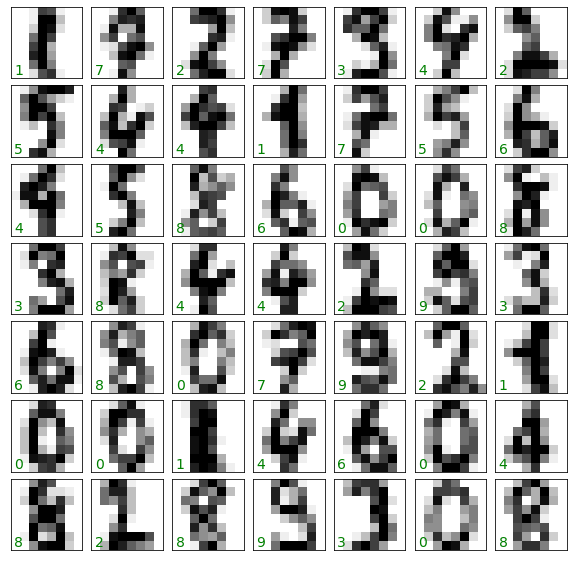

In [2]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

In [3]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


In [4]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(digits.data)
X_transformed.shape


C:\Users\LEONARDO\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\LEONARDO\anaconda3\lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

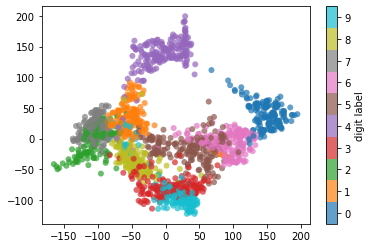

In [5]:
# Plot all of the data points in the two projected dimensions.  
# Color the points by their labels.
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=digits.target, edgecolor='none', alpha=0.7, cmap= 'tab10') #discrete_cmap(10,'nipy_spectral'));

plt.colorbar(label='digit label', ticks=range(10))

plt.clim(-0.5,9.5)

## Part 3

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000,solver='sag')
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='sag')

In [8]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
AT = accuracy_score(y_test, y_pred)

y_predtrain = clf.predict(X_train)
AV = accuracy_score(y_train, y_predtrain)
print(AT)
print(AV)

0.9694444444444444
1.0


In [9]:
from sklearn.metrics import confusion_matrix

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_6184\824005870.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(y_test, y_pred)),


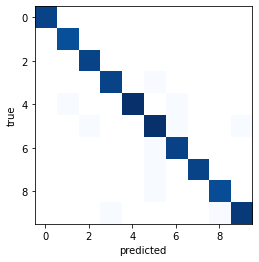

In [10]:
print(confusion_matrix(y_test, y_pred))
plt.imshow(np.log(confusion_matrix(y_test, y_pred)), 
           cmap='Blues', interpolation='nearest');
plt.ylabel('true')
plt.xlabel('predicted');